In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import json
import csv
import operator
from matplotlib import dates
import datetime
from sqlalchemy.orm import Session
%matplotlib inline
import io 

In [5]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#to upload CSVs
from google.colab import files 
  
  
uploaded = files.upload()



Saving AAPL Historical Data.csv to AAPL Historical Data (1).csv
Saving CVX Historical Data.csv to CVX Historical Data.csv
Saving MRK Historical Data.csv to MRK Historical Data (1).csv


In [6]:
#create dataframes
df_Appl = pd.read_csv(io.BytesIO(uploaded['AAPL Historical Data.csv'])) 
print(df_Appl)

            Date   Price    Open    High     Low   Volume  Change %
0     2020-11-13  119.26  119.44  119.67  117.87   81.69M    0.0004
1     2020-11-12  119.21  119.55  120.52  118.58  103.35M   -0.0023
2     2020-11-11  119.49  117.17  119.59  116.51  112.29M    0.0304
3     2020-11-10  115.97  115.57  117.58  114.14  138.02M   -0.0030
4     2020-11-09  116.32  120.50  121.98  116.12  154.52M   -0.0200
...          ...     ...     ...     ...     ...      ...       ...
2514  2010-11-19   10.95   11.00   11.01   10.90  384.84M   -0.0064
2515  2010-11-18   11.02   10.90   11.06   10.88  494.49M    0.0270
2516  2010-11-17   10.73   10.76   10.86   10.63  479.45M   -0.0037
2517  2010-11-16   10.77   10.92   10.99   10.69  658.95M   -0.0182
2518  2010-11-15   10.97   11.02   11.09   10.94  403.60M   -0.0027

[2519 rows x 7 columns]


In [7]:
df_CVX = pd.read_csv(io.BytesIO(uploaded['CVX Historical Data.csv'])) 
df_CVX.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-11-13,83.03,81.15,83.34,81.03,10.90M,0.0293
1,2020-11-12,80.67,81.03,82.23,79.91,8.93M,-0.0217
2,2020-11-11,82.46,84.21,84.49,81.81,11.64M,-0.0073
3,2020-11-10,83.07,81.80,83.13,79.77,15.04M,0.0462
4,2020-11-09,79.40,80.29,84.22,78.27,24.02M,0.1160


In [8]:
df_MRK = pd.read_csv(io.BytesIO(uploaded['MRK Historical Data.csv'])) 
df_MRK.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2513,2010-11-19,35.33,35.30,35.36,34.92,15.63M,0.0011
2514,2010-11-18,35.29,35.14,35.34,34.85,15.67M,0.0238
2515,2010-11-17,34.47,34.81,35.65,34.45,20.03M,0.0109
2516,2010-11-16,34.10,34.31,34.44,33.94,22.05M,-0.0127
2517,2010-11-15,34.54,34.71,34.96,34.52,13.12M,-0.0049


In [9]:
#set index as date
df_MRK['Date'] = pd.to_datetime(df_MRK.Date,format='%Y-%m-%d')
df_MRK.index = df_MRK['Date']

In [10]:
df_Appl['Date'] = pd.to_datetime(df_Appl.Date,format='%Y-%m-%d')
df_Appl.index = df_Appl['Date']

In [11]:
df_CVX['Date'] = pd.to_datetime(df_CVX.Date,format='%Y-%m-%d')
df_CVX.index = df_CVX['Date']

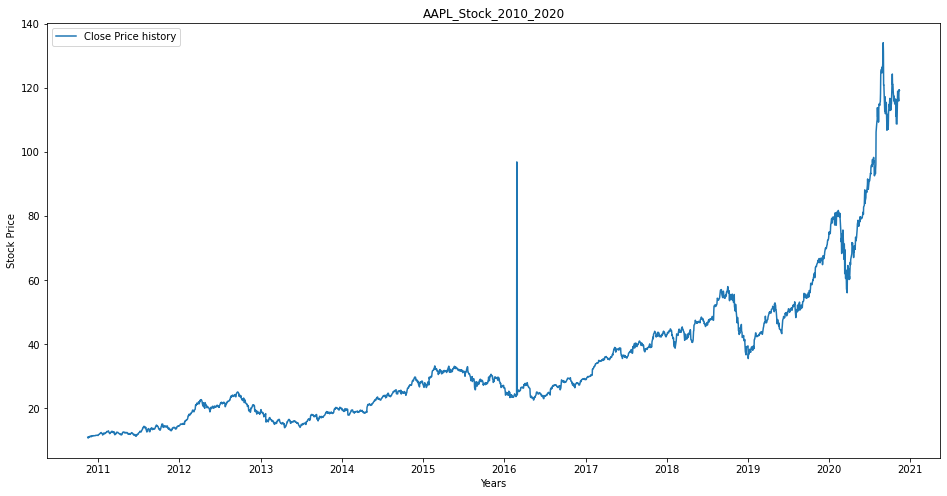

In [13]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_Appl['Price'], label='Close Price history')
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("AAPL_Stock_2010_2020")
plt.legend()

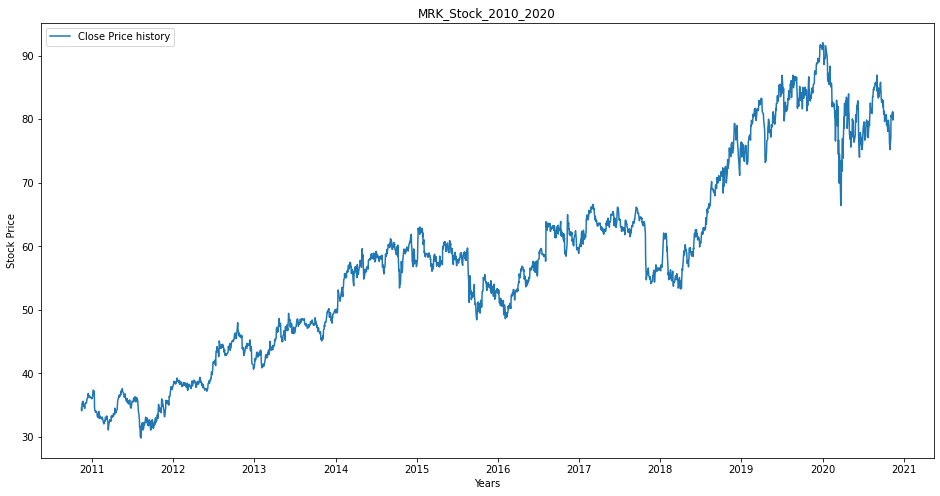

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df_MRK['Price'], label='Close Price history')
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("MRK_Stock_2010_2020")
plt.legend()

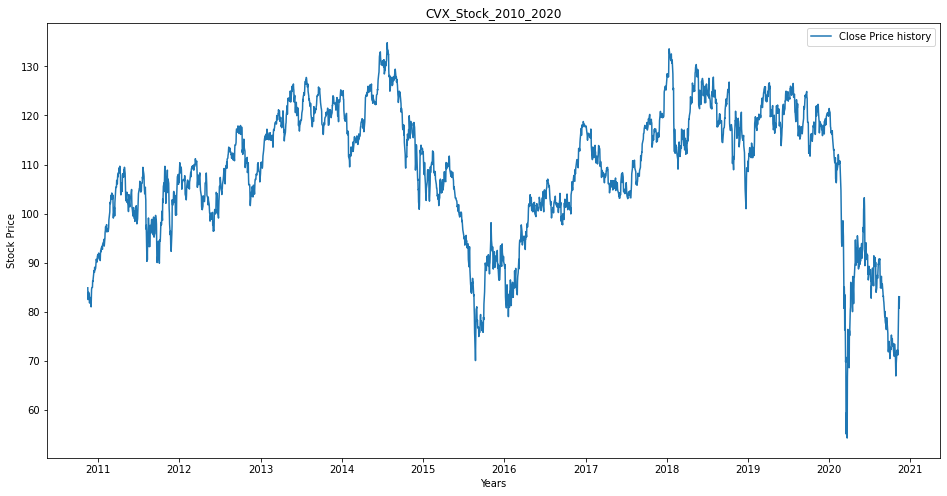

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df_CVX['Price'], label='Close Price history')
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("CVX_Stock_2010_2020")
plt.legend()

In [16]:
#creating dataframe with date and the target variable
data_Appl = df_Appl.sort_index(ascending=True, axis=0)
new_data_Appl = pd.DataFrame(index=range(0,len(df_Appl)),columns=['Date', 'Price'])

In [17]:
data_MRK = df_MRK.sort_index(ascending=True, axis=0)
new_data_MRK = pd.DataFrame(index=range(0,len(df_MRK)),columns=['Date', 'Price'])

In [18]:
data_CVX = df_CVX.sort_index(ascending=True, axis=0)
new_data_CVX = pd.DataFrame(index=range(0,len(df_CVX)),columns=['Date', 'Price'])

In [19]:
#for loop to append 2 columns of data
for i in range(0,len(data_Appl)):
     new_data_Appl['Date'][i] = data_Appl['Date'][i]
     new_data_Appl['Price'][i] = data_Appl['Price'][i]

In [ ]:
#new_data_Appl

In [20]:
for i in range(0,len(data_CVX)):
     new_data_CVX['Date'][i] = data_CVX['Date'][i]
     new_data_CVX['Price'][i] = data_CVX['Price'][i]

In [21]:
new_data_CVX.head()

,Date,Price
0,2010-11-15 00:00:00,84.86
1,2010-11-16 00:00:00,82.48
2,2010-11-17 00:00:00,82.46
3,2010-11-18 00:00:00,83.82
4,2010-11-19 00:00:00,83.94


In [22]:
for i in range(0,len(data_MRK)):
     new_data_MRK['Date'][i] = data_MRK['Date'][i]
     new_data_MRK['Price'][i] = data_MRK['Price'][i]

In [23]:
new_data_MRK.tail()

,Date,Price
2513,2020-11-09 00:00:00,80.5
2514,2020-11-10 00:00:00,81.11
2515,2020-11-11 00:00:00,81.06
2516,2020-11-12 00:00:00,79.86
2517,2020-11-13 00:00:00,81.09


In [24]:
# split dataframes into train and validation sets (used 80% of data for train; 20% for validation)
train_Appl = new_data_Appl[:2015]
valid_Appl = new_data_Appl[2015:]

In [25]:
train_MRK = new_data_MRK[:2015]
valid_MRK = new_data_MRK[2015:]

In [26]:
train_CVX = new_data_CVX[:2015]
valid_CVX = new_data_CVX[2015:]

In [28]:
# size/shape of training set arrays for models
print('\n size of training sets:')
print(train_Appl.shape + train_MRK.shape + train_CVX.shape)


 size of training sets:
(2015, 2, 2015, 2, 2015, 2)


In [29]:
# shapes of validation sets
print('\n Shape of validation sets:')
print(valid_Appl.shape + valid_MRK.shape + valid_CVX.shape)


 Shape of validation sets:
(504, 2, 503, 2, 503, 2)


In [31]:
# create predictions for the validation sets and check the RMSEs using actual values
preds_Appl = []
for i in range(0,valid_Appl.shape[0]):
    a = train_Appl['Price'][len(train_Appl)-504+i:].sum() + sum(preds_Appl)
    b = a/504
    preds_Appl.append(b)

In [32]:
# checking the results (RMSE value)
rms_Appl=np.sqrt(np.mean(np.power((np.array(valid_Appl['Price'])-preds_Appl),2)))
print('\n RMSE value on APPL validation set:')
print(rms_Appl)


 RMSE value on APPL validation set:
33.69071306989303


In [33]:
preds_MRK = []
for i in range(0,valid_MRK.shape[0]):
    a = train_MRK['Price'][len(train_MRK)-503+i:].sum() + sum(preds_MRK)
    b = a/503
    preds_MRK.append(b)

In [34]:
rms_MRK=np.sqrt(np.mean(np.power((np.array(valid_MRK['Price'])-preds_MRK),2)))
print('\n RMSE value on Merck validation set:')
print(rms_MRK)


 RMSE value on Merck validation set:
19.251999226970835


In [35]:
preds_CVX = []
for i in range(0,valid_CVX.shape[0]):
    a = train_CVX['Price'][len(train_CVX)-503+i:].sum() + sum(preds_CVX)
    b = a/503
    preds_CVX.append(b)

In [36]:
rms_CVX=np.sqrt(np.mean(np.power((np.array(valid_CVX['Price'])-preds_CVX),2)))
print('\n RMSE value on Chevron validation set:')
print(rms_CVX)


 RMSE value on Chevron validation set:
22.285959587973167


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


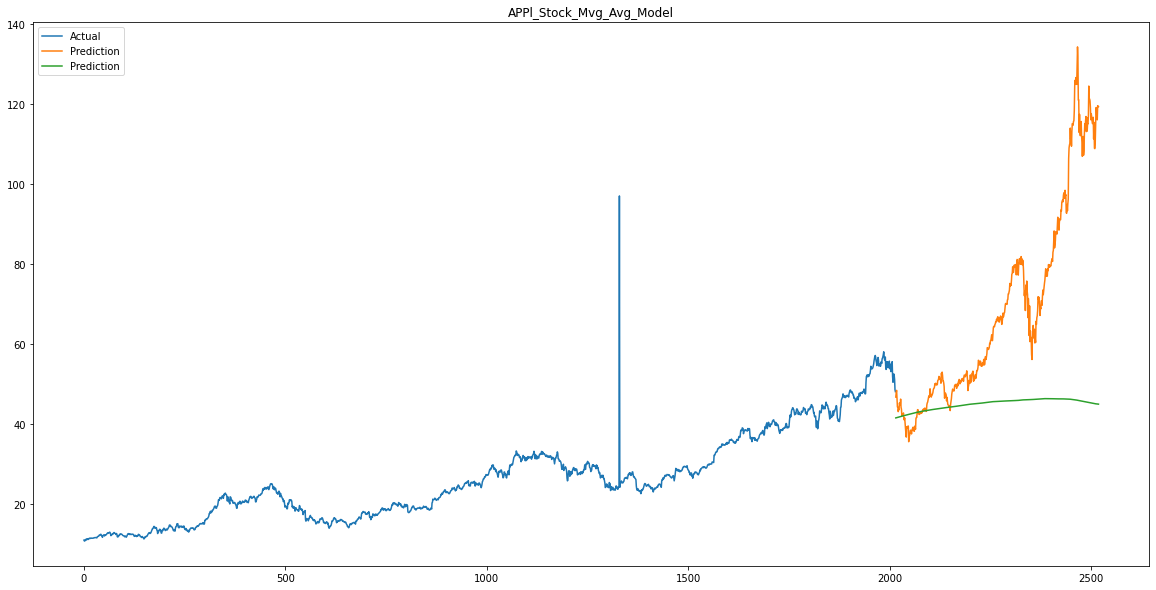

In [37]:
#plots of the predicted values along with the actual values.
valid_Appl['Predictions'] = 0
valid_Appl['Predictions'] = preds_Appl
plt.plot(train_Appl['Price'], label="Actual")
plt.plot(valid_Appl[['Price', 'Predictions']], label="Prediction")
plt.title("APPl_Stock_Mvg_Avg_Model")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


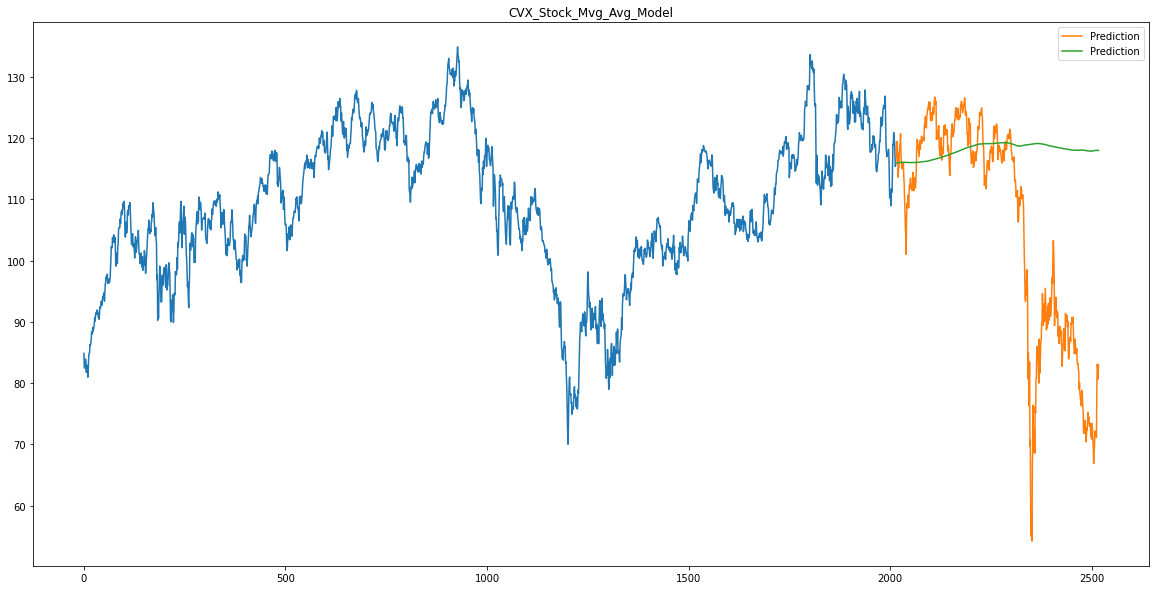

In [38]:
valid_CVX['Predictions'] = 0
valid_CVX['Predictions'] = preds_CVX
plt.plot(train_CVX['Price'])
plt.plot(valid_CVX[['Price', 'Predictions']], label="Prediction")
plt.title("CVX_Stock_Mvg_Avg_Model")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


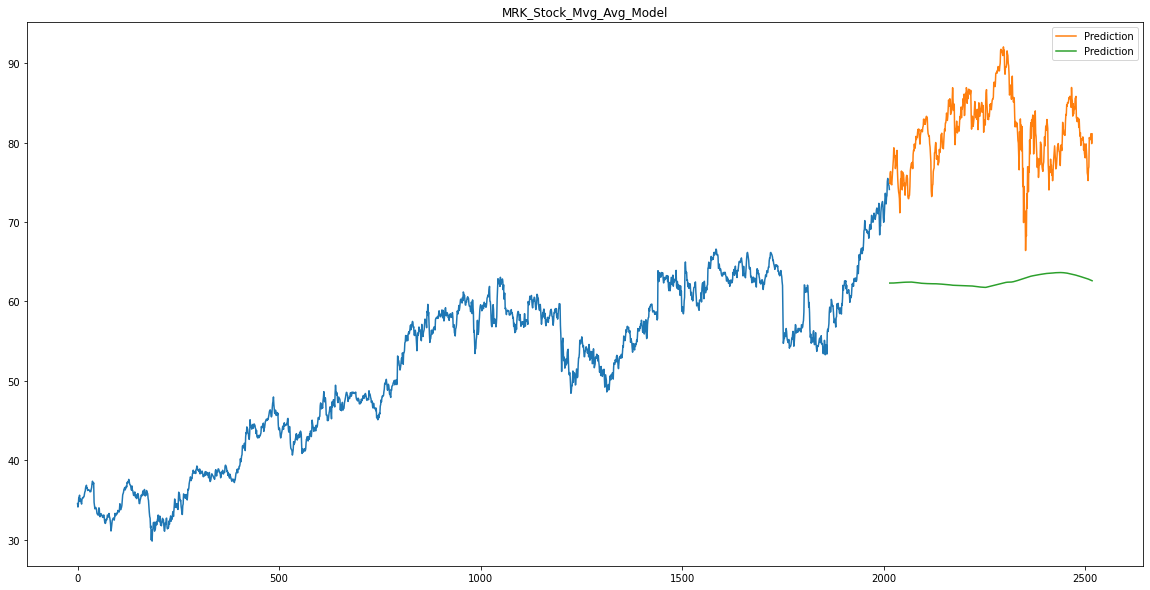

In [39]:
valid_MRK['Predictions'] = 0
valid_MRK['Predictions'] = preds_MRK
plt.plot(train_MRK['Price'])
plt.plot(valid_MRK[['Price', 'Predictions']], label="Prediction")
plt.title("MRK_Stock_Mvg_Avg_Model")
plt.legend()

# Linear Regression

In [40]:
#setting index as date values
df_Appl['Date'] = pd.to_datetime(df_Appl.Date,format='%Y-%m-%d')
df_Appl.index = df_Appl['Date']

In [41]:
df_CVX['Date'] = pd.to_datetime(df_CVX.Date,format='%Y-%m-%d')
df_CVX.index = df_CVX['Date']

In [42]:
df_MRK['Date'] = pd.to_datetime(df_MRK.Date,format='%Y-%m-%d')
df_MRK.index = df_MRK['Date']

In [43]:
#sorting
data_Appl = df_Appl.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data_Appl = pd.DataFrame(index=range(0,len(df_Appl)),columns=['Date', 'Price'])

for i in range(0,len(data_Appl)):
    new_data_Appl['Date'][i] = data_Appl['Date'][i]
    new_data_Appl['Price'][i] = data_Appl['Price'][i]

In [44]:
data_MRK = df_MRK.sort_index(ascending=True, axis=0)

In [45]:
new_data_MRK = pd.DataFrame(index=range(0,len(df_MRK)),columns=['Date', 'Price'])

In [46]:
for i in range(0,len(data_MRK)):
    new_data_MRK['Date'][i] = data_MRK['Date'][i]
    new_data_MRK['Price'][i] = data_MRK['Price'][i]

In [47]:
new_data_MRK

,Date,Price
0,2010-11-15 00:00:00,34.54
1,2010-11-16 00:00:00,34.1
2,2010-11-17 00:00:00,34.47
3,2010-11-18 00:00:00,35.29
4,2010-11-19 00:00:00,35.33
...,...,...
2513,2020-11-09 00:00:00,80.5
2514,2020-11-10 00:00:00,81.11
2515,2020-11-11 00:00:00,81.06
2516,2020-11-12 00:00:00,79.86


In [48]:
data_CVX = df_CVX.sort_index(ascending=True, axis=0)

In [49]:
new_data_CVX = pd.DataFrame(index=range(0,len(df_CVX)),columns=['Date', 'Price'])

In [50]:
for i in range(0,len(data_CVX)):
    new_data_CVX['Date'][i] = data_CVX['Date'][i]
    new_data_CVX['Price'][i] = data_CVX['Price'][i]

In [51]:
#create features
from fastai.tabular import  add_datepart
add_datepart(new_data_Appl, 'Date')
new_data_Appl.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.6/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [52]:
add_datepart(new_data_CVX, 'Date')
new_data_CVX.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.6/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [53]:
add_datepart(new_data_MRK, 'Date')
new_data_MRK.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.6/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [54]:
#use fastai feature to add 1 if day is monday or friday
new_data_Appl['mon_fri'] = 0
for i in range(0,len(new_data_Appl)):
    if (new_data_Appl['Dayofweek'][i] == 0 or new_data_Appl['Dayofweek'][i] == 4):
        new_data_Appl['mon_fri'][i] = 1
    else:
        new_data_Appl['mon_fri'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [55]:
new_data_Appl.head()

,Price,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,10.97,2010,11,46,15,0,319,False,False,False,False,False,False,1
1,10.77,2010,11,46,16,1,320,False,False,False,False,False,False,0
2,10.73,2010,11,46,17,2,321,False,False,False,False,False,False,0
3,11.02,2010,11,46,18,3,322,False,False,False,False,False,False,0
4,10.95,2010,11,46,19,4,323,False,False,False,False,False,False,1


In [56]:
#split into train and validation
train_Appl = new_data_Appl[:2015]
valid_Appl = new_data_Appl[2015:]

x_train_Appl = train_Appl.drop('Price', axis=1)
y_train_Appl = train_Appl['Price']
x_valid_Appl = valid_Appl.drop('Price', axis=1)
y_valid_Appl = valid_Appl['Price']

#implement linear regression
from sklearn.linear_model import LinearRegression
model_Appl = LinearRegression()
model_Appl.fit(x_train_Appl,y_train_Appl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#split into train and validation
train_CVX = new_data_CVX[:2015]
valid_CVX = new_data_CVX[2015:]

x_train_CVX = train_CVX.drop('Price', axis=1)
y_train_CVX = train_CVX['Price']
x_valid_CVX = valid_CVX.drop('Price', axis=1)
y_valid_CVX = valid_CVX['Price']

#implement linear regression
from sklearn.linear_model import LinearRegression
model_CVX = LinearRegression()
model_CVX.fit(x_train_CVX,y_train_CVX)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#split into train and validation
train_MRK = new_data_MRK[:2015]
valid_MRK = new_data_MRK[2015:]

x_train_MRK = train_MRK.drop('Price', axis=1)
y_train_MRK = train_MRK['Price']
x_valid_MRK = valid_MRK.drop('Price', axis=1)
y_valid_MRK = valid_MRK['Price']

#implement linear regression
from sklearn.linear_model import LinearRegression
model_MRK = LinearRegression()
model_MRK.fit(x_train_MRK,y_train_MRK)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#make predictions and find the rmse
preds_Appl = model_Appl.predict(x_valid_Appl)
rms_Appl=np.sqrt(np.mean(np.power((np.array(y_valid_Appl)-np.array(preds_Appl)),2)))
rms_Appl

30.88325159317243

In [60]:
preds_CVX = model_CVX.predict(x_valid_CVX)
rms_CVX=np.sqrt(np.mean(np.power((np.array(y_valid_CVX)-np.array(preds_CVX)),2)))
rms_CVX

19.576439149022146

In [61]:
preds_MRK = model_MRK.predict(x_valid_MRK)
rms_MRK=np.sqrt(np.mean(np.power((np.array(y_valid_MRK)-np.array(preds_MRK)),2)))
rms_MRK

10.228206687568811

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


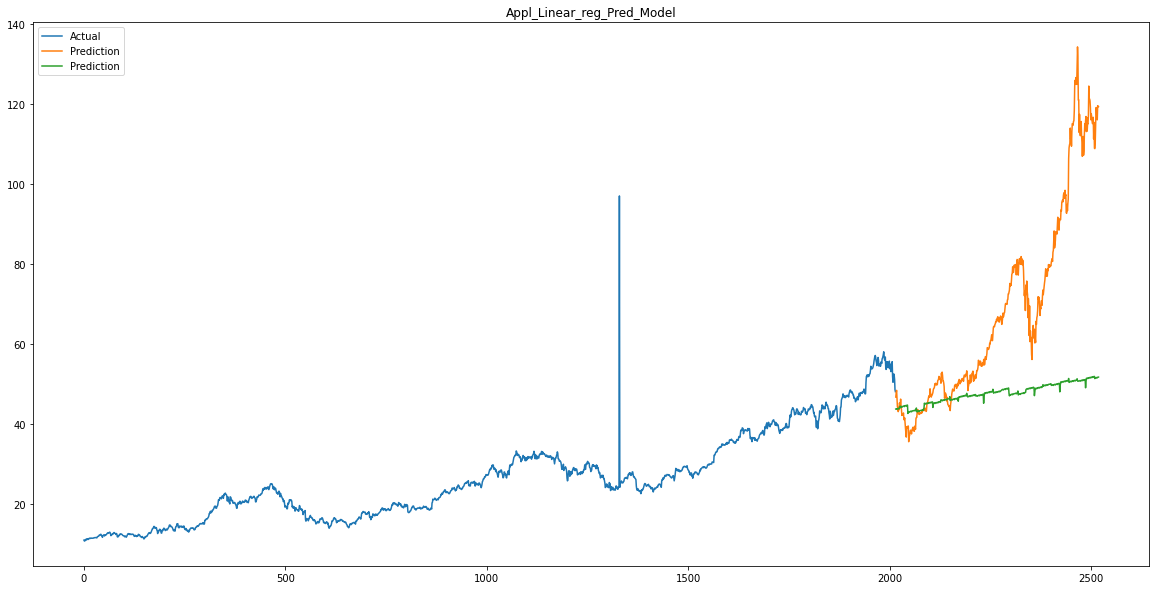

In [66]:
#plot
valid_Appl['Predictions'] = 0
valid_Appl['Predictions'] = preds_Appl

valid_Appl.index = new_data_Appl[2015:].index
train_Appl.index = new_data_Appl[:2015].index

plt.plot(train_Appl['Price'], label="Actual")
plt.plot(valid_Appl[['Price', 'Predictions']], label="Prediction")
plt.title("Appl_Linear_reg_Pred_Model")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


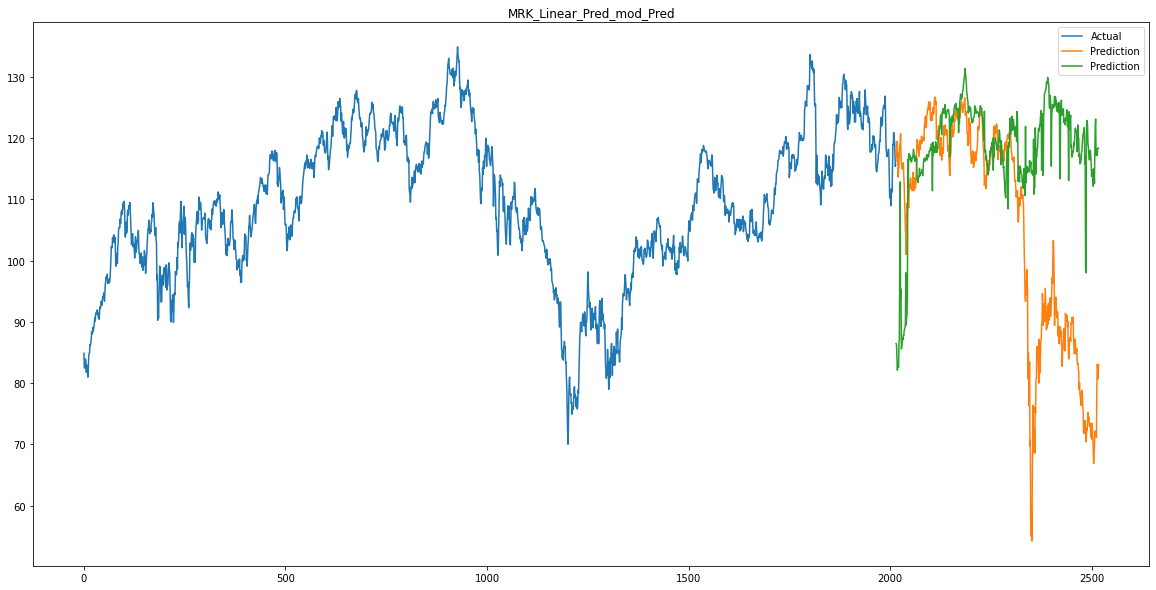

In [79]:
#plot
valid_CVX['Predictions'] = 0
valid_CVX['Predictions'] = preds_CVX

valid_CVX.index = new_data_CVX[2015:].index
train_CVX.index = new_data_CVX[:2015].index

plt.plot(train_CVX['Price'], label="Actual")
plt.plot(valid_CVX[['Price', 'Predictions']], label="Prediction")
plt.title("MRK_Linear_mod_Pred")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


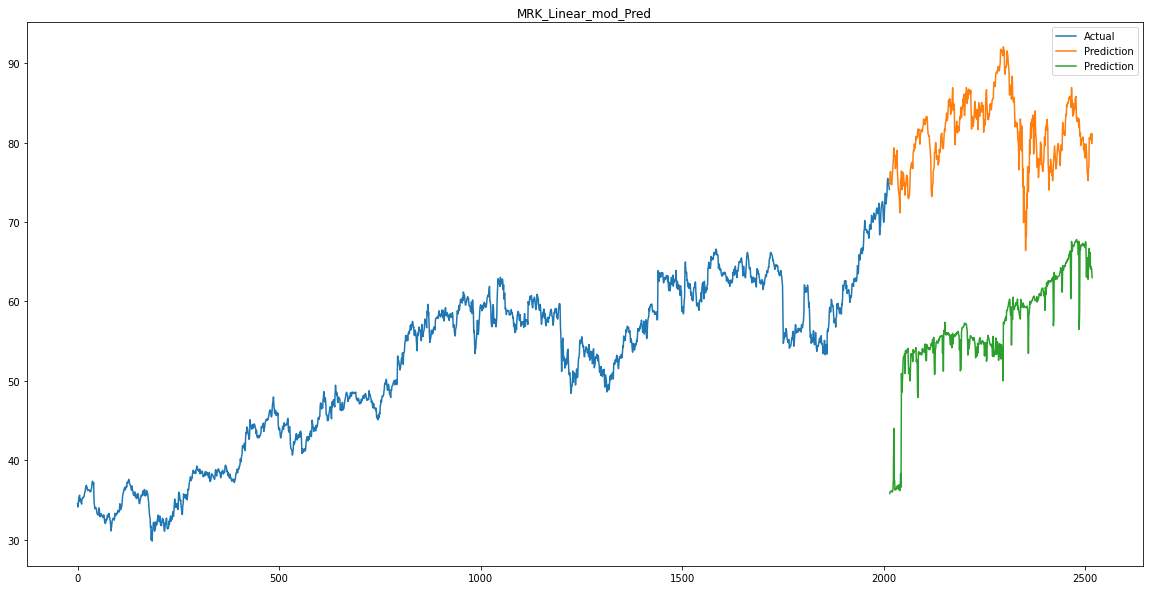

In [80]:
#plot
valid_MRK['Predictions'] = 0
valid_MRK['Predictions'] = preds_MRK

valid_MRK.index = new_data_MRK[2015:].index
train_MRK.index = new_data_MRK[:2015].index

plt.plot(train_MRK['Price'], label="Actual")
plt.plot(valid_MRK[['Price', 'Predictions']], label="Prediction")
plt.title("MRK_Linear_mod_Pred")
plt.legend()

# K Nearest Neighbors

In [81]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [82]:
#Using the same train and validation sets from the last section
#scaling data
x_train_scaled_Appl = scaler.fit_transform(x_train_Appl)
x_train_Appl = pd.DataFrame(x_train_scaled_Appl)
x_valid_scaled_Appl = scaler.fit_transform(x_valid_Appl)
x_valid_Appl = pd.DataFrame(x_valid_scaled_Appl)

#using gridsearch to find the best parameter
params_Appl = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn_Appl = neighbors.KNeighborsRegressor()
model_Appl = GridSearchCV(knn_Appl, params_Appl, cv=5)

#fit the model and make predictions
model_Appl.fit(x_train_Appl,y_train_Appl)
preds_Appl = model_Appl.predict(x_valid_Appl)

In [83]:
x_train_scaled_MRK = scaler.fit_transform(x_train_MRK)
x_train_MRK = pd.DataFrame(x_train_scaled_MRK)
x_valid_scaled_MRK = scaler.fit_transform(x_valid_MRK)
x_valid_MRK = pd.DataFrame(x_valid_scaled_MRK)

#using gridsearch to find the best parameter
params_MRK = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn_MRK = neighbors.KNeighborsRegressor()
model_MRK = GridSearchCV(knn_MRK, params_MRK, cv=5)

#fit the model and make predictions
model_MRK.fit(x_train_MRK,y_train_MRK)
preds_MRK = model_MRK.predict(x_valid_MRK)

In [84]:
x_train_scaled_CVX = scaler.fit_transform(x_train_CVX)
x_train_CVX = pd.DataFrame(x_train_scaled_CVX)
x_valid_scaled_CVX = scaler.fit_transform(x_valid_CVX)
x_valid_CVX = pd.DataFrame(x_valid_scaled_CVX)

#using gridsearch to find the best parameter
params_CVX = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn_CVX = neighbors.KNeighborsRegressor()
model_CVX = GridSearchCV(knn_CVX, params_CVX, cv=5)

#fit the model and make predictions
model_CVX.fit(x_train_CVX,y_train_CVX)
preds_CVX = model_CVX.predict(x_valid_CVX)

In [85]:
#rmse
rm_Appl=np.sqrt(np.mean(np.power((np.array(y_valid_Appl)-np.array(preds_Appl)),2)))
rms_Appl

30.88325159317243

In [86]:
rm_CVX=np.sqrt(np.mean(np.power((np.array(y_valid_CVX)-np.array(preds_CVX)),2)))
rms_CVX

19.576439149022146

In [87]:
rm_MRK=np.sqrt(np.mean(np.power((np.array(y_valid_MRK)-np.array(preds_MRK)),2)))
rms_MRK

10.228206687568811

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


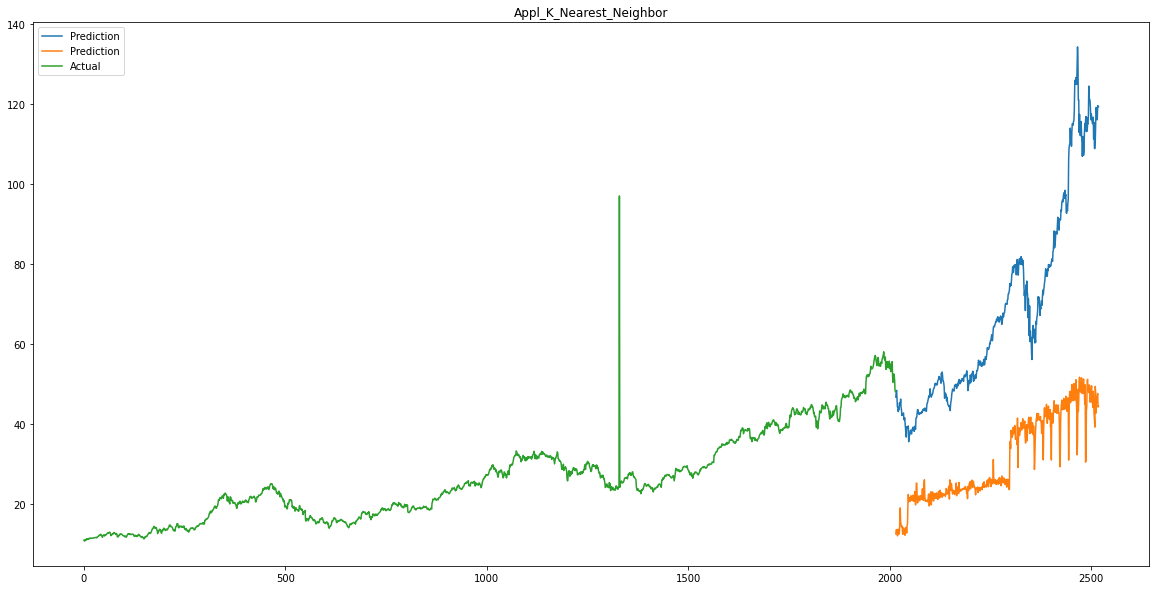

In [89]:
#plot
valid_Appl['Predictions'] = 0
valid_Appl['Predictions'] = preds_Appl
plt.plot(valid_Appl[['Price', 'Predictions']], label="Prediction")
plt.plot(train_Appl['Price'], label="Actual")
plt.title("Appl_K_Nearest_Neighbor")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


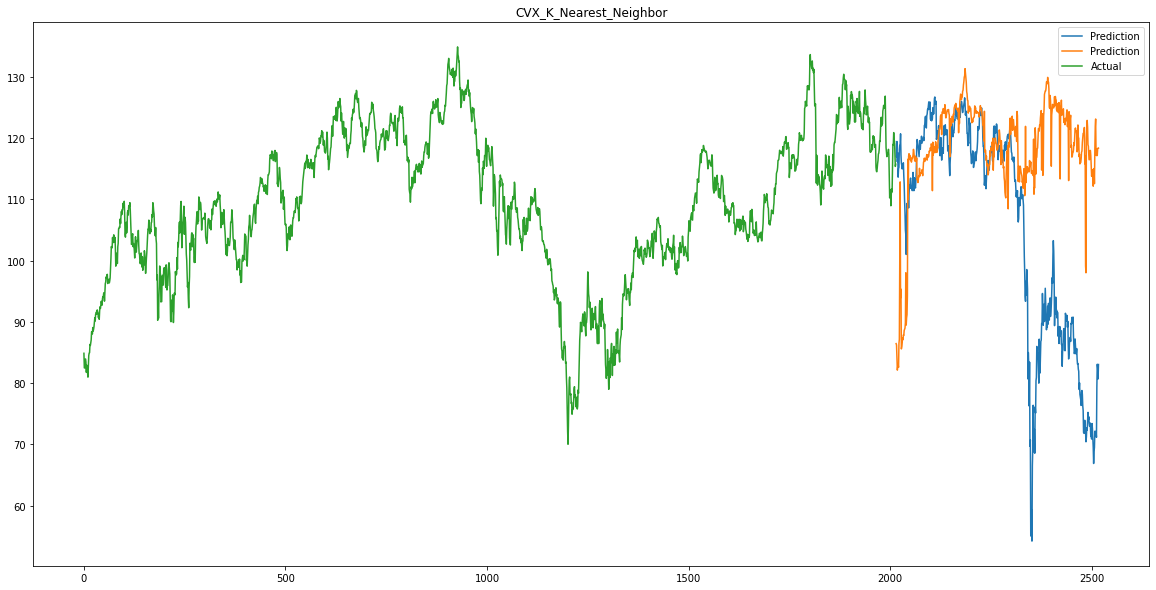

In [90]:
valid_CVX['Predictions'] = 0
valid_CVX['Predictions'] = preds_CVX
plt.plot(valid_CVX[['Price', 'Predictions']], label="Prediction")
plt.plot(train_CVX['Price'], label="Actual")
plt.title("CVX_K_Nearest_Neighbor")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


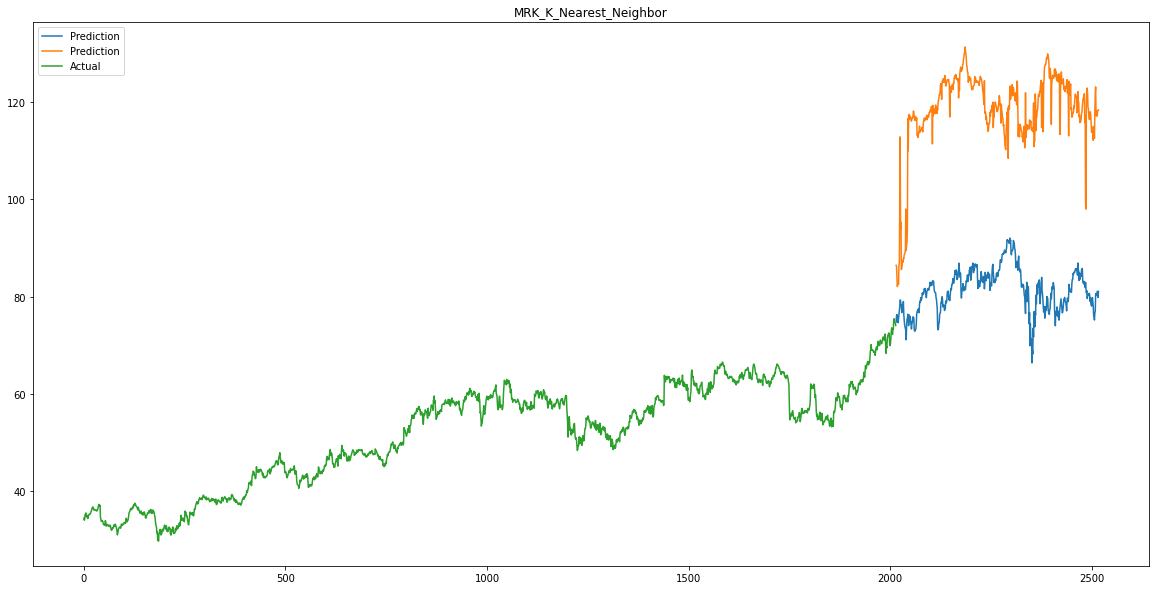

In [91]:
valid_MRK['Predictions'] = 0
valid_MRK['Predictions'] = preds_CVX
plt.plot(valid_MRK[['Price', 'Predictions']], label="Prediction")
plt.plot(train_MRK['Price'], label="Actual")
plt.title("MRK_K_Nearest_Neighbor")
plt.legend()

# Auto ARIMA

In [92]:
!pip install pyramid.arima

     |████████████████████████████████| 604kB 5.6MB/s 


In [93]:
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [94]:
data_Appl = df_Appl.sort_index(ascending=True, axis=0)

train_Appl = data_Appl[:2015]
valid_Appl = data_Appl[2015:]

training_Appl = train_Appl['Price']
validation_Appl = valid_Appl['Price']

model_Appl = auto_arima(training_Appl, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model_Appl.fit(training_Appl)

forecast_Appl = model_Appl.predict(n_periods=504)
forecast_Appl = pd.DataFrame(forecast_Appl,index = valid_Appl.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8192.837, BIC=8220.846, Fit time=33.356 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=10473.930, BIC=10485.134, Fit time=0.147 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=9349.569, BIC=9371.976, Fit time=2.999 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8190.852, BIC=8213.259, Fit time=22.288 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=8192.820, BIC=8220.830, Fit time=27.653 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=9526.952, BIC=9543.758, Fit time=1.354 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=8192.830, BIC=8220.839, Fit time=49.657 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=8194.447, BIC=8228.059, Fit time=58.838 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=9140.742, BIC=9157.548, Fit time=9.893 seconds
Fit ARIMA: order=(0, 

In [95]:
rms_Appl=np.sqrt(np.mean(np.power((np.array(valid_Appl['Price'])-np.array(forecast_Appl['Prediction'])),2)))
rms_Appl

21.94782018731616

In [136]:
data_CVX = df_CVX
training_CVX = train_CVX['Price']
validation_CVX = valid_CVX['Price']

model_CVX = auto_arima(training_Appl, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model_CVX.fit(training_CVX)

forecast_CVX = model_CVX.predict(n_periods=503)
forecast_CVX = pd.DataFrame(forecast_CVX,index = valid_CVX.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8192.837, BIC=8220.846, Fit time=33.026 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=10473.930, BIC=10485.134, Fit time=0.136 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=9349.569, BIC=9371.976, Fit time=2.979 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8190.852, BIC=8213.259, Fit time=22.248 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=8192.820, BIC=8220.830, Fit time=27.536 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=9526.952, BIC=9543.758, Fit time=1.320 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=8192.830, BIC=8220.839, Fit time=49.594 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=8194.447, BIC=8228.059, Fit time=59.170 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=9140.742, BIC=9157.548, Fit time=9.919 seconds
Fit ARIMA: order=(0, 

In [137]:
rms_CVX=np.sqrt(np.mean(np.power((np.array(valid_CVX['Price'])-np.array(forecast_CVX['Prediction'])),2)))
rms_CVX

17.287588190616393

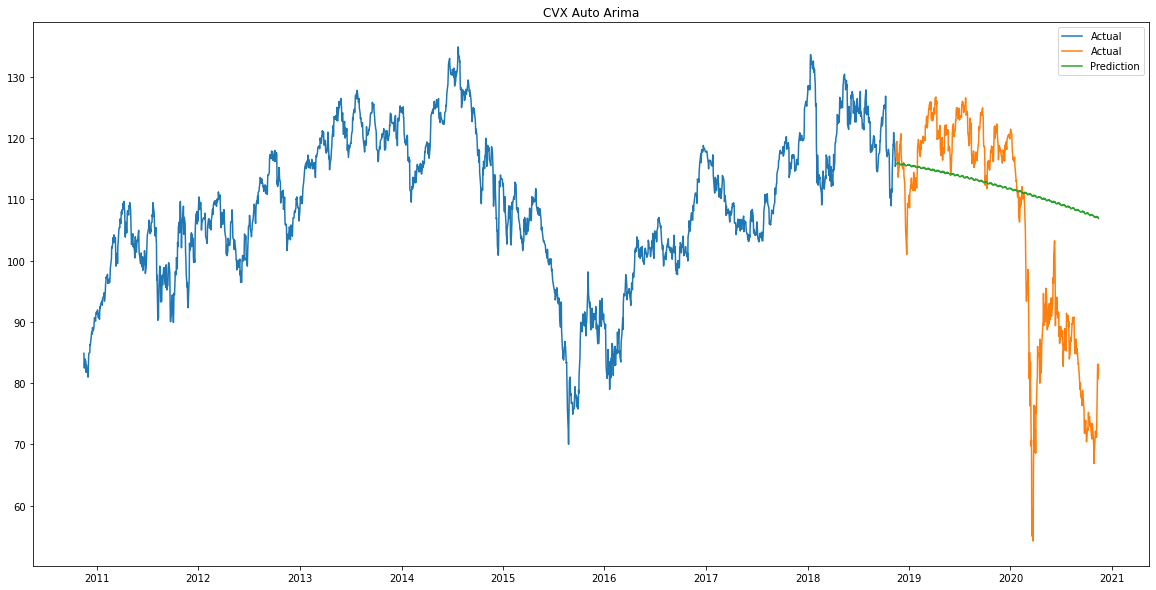

In [138]:
plt.plot(train_CVX['Price'], label="Actual")
plt.plot(valid_CVX['Price'], label="Actual")
plt.plot(forecast_CVX['Prediction'], label="Prediction")
plt.title("CVX Auto Arima")
plt.legend()

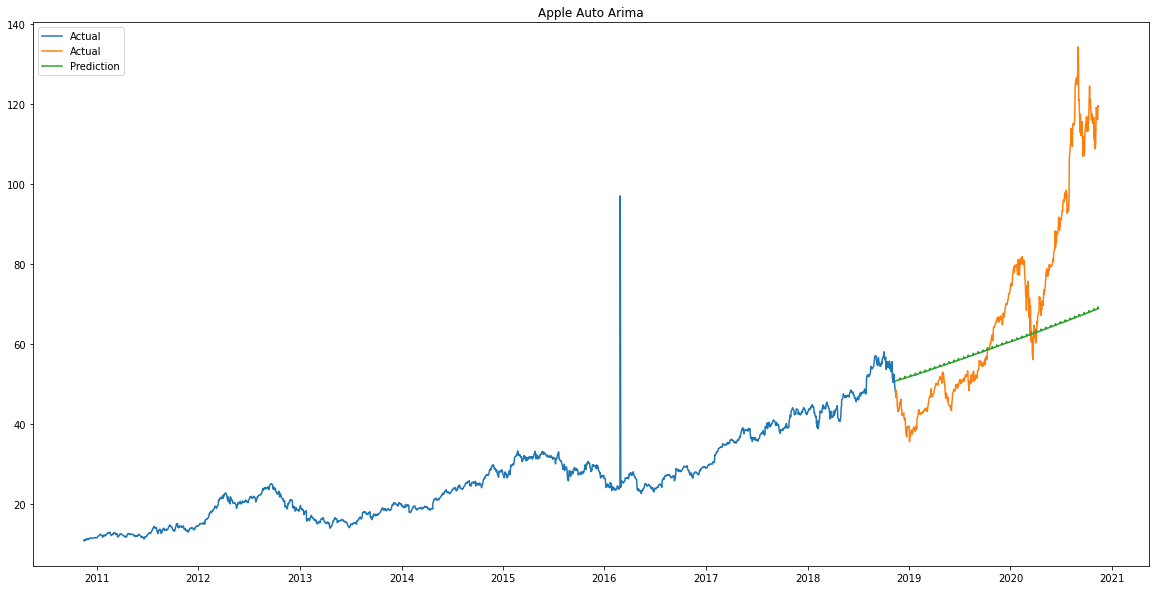

In [98]:
#plot
plt.plot(train_Appl['Price'], label="Actual")
plt.plot(valid_Appl['Price'], label="Actual")
plt.plot(forecast_Appl['Prediction'], label="Prediction")
plt.title("Apple Auto Arima")
plt.legend()

# Prophet

In [99]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data_Appl = pd.DataFrame(index=range(0,len(df_Appl)),columns=['Date', 'Price'])

for i in range(0,len(data_Appl)):
    new_data_Appl['Date'][i] = data_Appl['Date'][i]
    new_data_Appl['Price'][i] = data_Appl['Price'][i]

new_data_Appl['Date'] = pd.to_datetime(new_data_Appl.Date,format='%Y-%m-%d')
new_data_Appl.index = new_data_Appl['Date']

#preparing data
new_data_Appl.rename(columns={'Price': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train_Appl = new_data_Appl[:2015]
valid_Appl = new_data_Appl[2015:]

#fit the model
model_Appl = Prophet()
model_Appl.fit(train_Appl)

#predictions
close_prices_Appl = model_Appl.make_future_dataframe(periods=len(valid_Appl))
forecast_Appl = model_Appl.predict(close_prices_Appl)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
new_data_CVX = pd.DataFrame(index=range(0,len(df_CVX)),columns=['Date', 'Price'])

In [101]:
for i in range(0,len(data_CVX)):
    new_data_CVX['Date'][i] = data_CVX['Date'][i]
    new_data_CVX['Price'][i] = data_CVX['Price'][i]

new_data_CVX['Date'] = pd.to_datetime(new_data_CVX.Date,format='%Y-%m-%d')
new_data_CVX.index = new_data_CVX['Date']

#preparing data
new_data_CVX.rename(columns={'Price': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train_CVX = new_data_CVX[:2015]
valid_CVX = new_data_CVX[2015:]

#fit the model
model_CVX = Prophet()
model_CVX.fit(train_CVX)

#predictions
close_prices_CVX = model_CVX.make_future_dataframe(periods=len(valid_CVX))
forecast_CVX = model_CVX.predict(close_prices_CVX)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
#creating dataframe
new_data_MRK = pd.DataFrame(index=range(0,len(df_MRK)),columns=['Date', 'Price'])

for i in range(0,len(data_MRK)):
    new_data_MRK['Date'][i] = data_MRK['Date'][i]
    new_data_MRK['Price'][i] = data_MRK['Price'][i]

new_data_MRK['Date'] = pd.to_datetime(new_data_MRK.Date,format='%Y-%m-%d')
new_data_MRK.index = new_data_MRK['Date']

#preparing data
new_data_MRK.rename(columns={'Price': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train_MRK = new_data_MRK[:2015]
valid_MRK = new_data_MRK[2015:]

#fit the model
model_MRK = Prophet()
model_MRK.fit(train_MRK)

#predictions
close_prices_MRK = model_MRK.make_future_dataframe(periods=len(valid_MRK))
forecast_MRK = model_MRK.predict(close_prices_MRK)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
#rmse
forecast_valid_Appl = forecast_Appl['yhat'][2015:]
rms_Appl=np.sqrt(np.mean(np.power((np.array(valid_Appl['y'])-np.array(forecast_valid_Appl)),2)))
rms_Appl

32.23492314848921

In [104]:
forecast_valid_CVX = forecast_CVX['yhat'][2015:]
rms_CVX=np.sqrt(np.mean(np.power((np.array(valid_CVX['y'])-np.array(forecast_valid_CVX)),2)))
rms_CVX

32.48512352780269

In [105]:
forecast_valid_MRK = forecast_MRK['yhat'][2015:]
rms_MRK=np.sqrt(np.mean(np.power((np.array(valid_MRK['y'])-np.array(forecast_valid_MRK)),2)))
rms_MRK

18.56919882050328

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



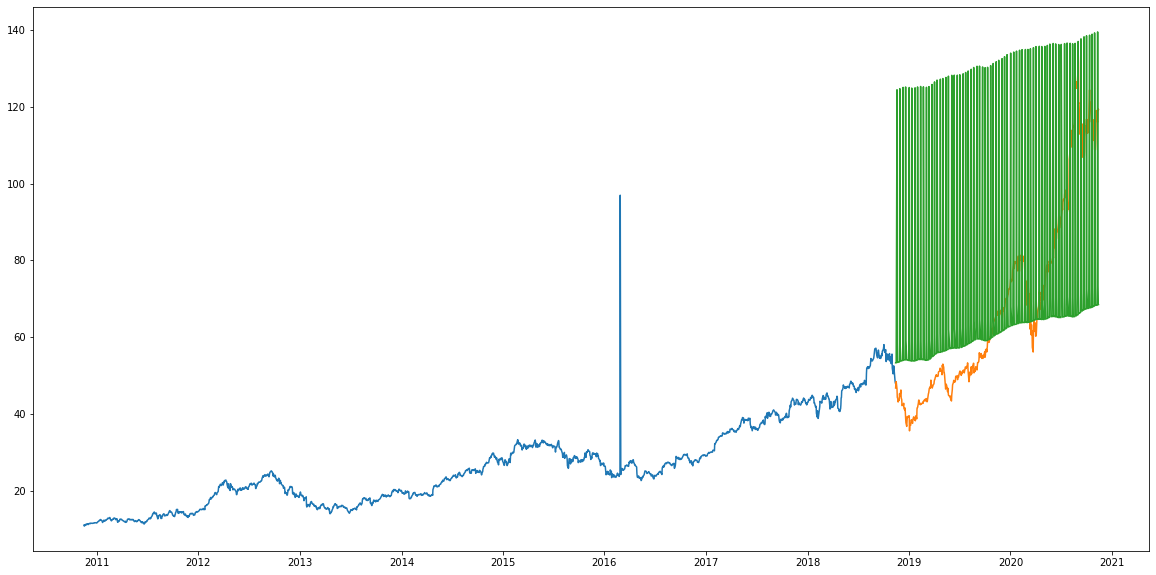

In [106]:
#plot
valid_Appl['Predictions'] = 0
valid_Appl['Predictions'] = forecast_valid_Appl.values

plt.plot(train_Appl['y'])
plt.plot(valid_Appl[['y', 'Predictions']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



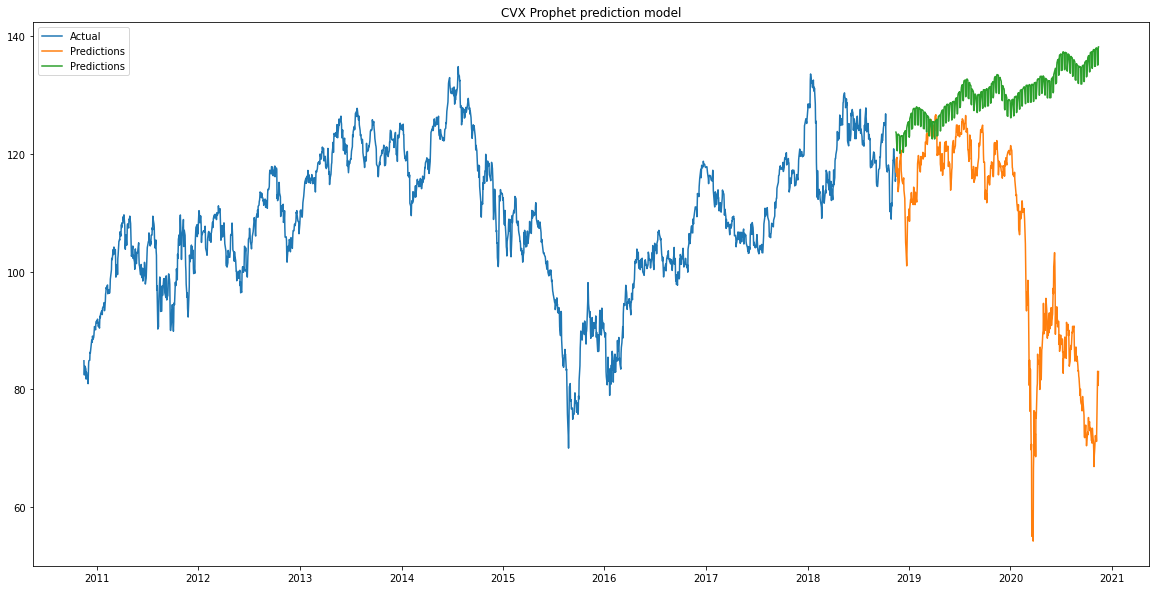

In [107]:
#plot
valid_CVX['Predictions'] = 0
valid_CVX['Predictions'] = forecast_valid_CVX.values

plt.plot(train_CVX['y'], label="Actual")
plt.plot(valid_CVX[['y', 'Predictions']], label="Predictions")
plt.title("CVX Prophet prediction model")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

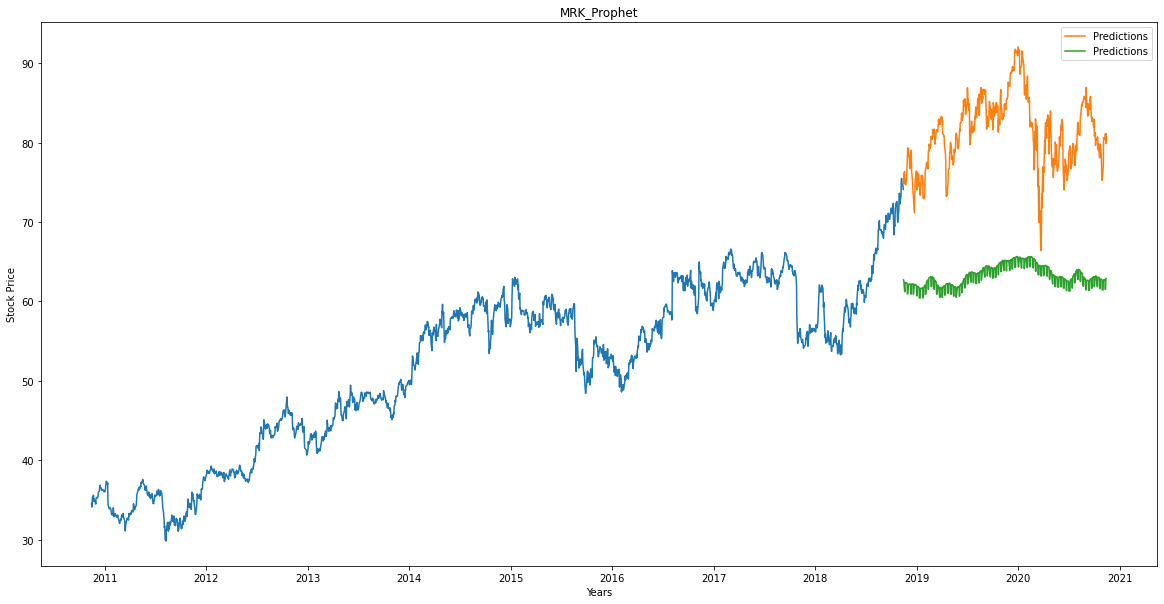

In [109]:
valid_MRK['Predictions'] = 0
valid_MRK['Predictions'] = forecast_valid_MRK.values

plt.plot(train_MRK['y'])
plt.plot(valid_MRK[['y', 'Predictions']], label="Predictions")
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("MRK_Prophet")
plt.legend()
plt.savefig("MRK_Prophet.png")
files.download("MRK_Prophet.png") 

Long Short Term Memory (LSTM)

In [110]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data_Appl = df_Appl.sort_index(ascending=True, axis=0)
new_data_Appl = pd.DataFrame(index=range(0,len(df_Appl)),columns=['Date', 'Price'])
for i in range(0,len(data_Appl)):
    new_data_Appl['Date'][i] = data_Appl['Date'][i]
    new_data_Appl['Price'][i] = data_Appl['Price'][i]

#setting index
new_data_Appl.index = new_data_Appl.Date
new_data_Appl.drop('Date', axis=1, inplace=True)
new_data_Appl

#creating train and test sets
dataset_Appl = new_data_Appl.values

In [111]:
#creating dataframe
data_CVX = df_CVX.sort_index(ascending=True, axis=0)
new_data_CVX = pd.DataFrame(index=range(0,len(df_CVX)),columns=['Date', 'Price'])
for i in range(0,len(data_CVX)):
    new_data_CVX['Date'][i] = data_CVX['Date'][i]
    new_data_CVX['Price'][i] = data_CVX['Price'][i]

#setting index
new_data_CVX.index = new_data_CVX.Date
new_data_CVX.drop('Date', axis=1, inplace=True)
new_data_CVX

#creating train and test sets
dataset_CVX = new_data_CVX.values

In [112]:
train_CVX = dataset_CVX[0:2015,:]
valid_CVX = dataset_CVX[2015:,:]

#converting dataset into x_train and y_train
scaler_CVX = MinMaxScaler(feature_range=(0, 1))
scaled_data_CVX = scaler_CVX.fit_transform(dataset_CVX)

x_train_CVX, y_train_CVX = [], []
for i in range(503,len(train_CVX)):
    x_train_CVX.append(scaled_data_CVX[i-503:i,0])
    y_train_CVX.append(scaled_data_CVX[i,0])
x_train_CVX, y_train_CVX = np.array(x_train_CVX), np.array(y_train_CVX)

x_train_CVX = np.reshape(x_train_CVX, (x_train_CVX.shape[0],x_train_CVX.shape[1],1))

# create and fit the LSTM network
model_CVX = Sequential()
model_CVX.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_CVX.shape[1],1)))
model_CVX.add(LSTM(units=50))
model_CVX.add(Dense(1))

model_CVX.compile(loss='mean_squared_error', optimizer='adam')
model_CVX.fit(x_train_CVX, y_train_CVX, epochs=1, batch_size=1, verbose=2)

#predicting values based on 80% past data in file
inputs_CVX = new_data_CVX[len(new_data_CVX) - len(valid_CVX) - 503:].values
inputs_CVX = inputs_CVX.reshape(-1,1)
inputs_CVX  = scaler_CVX.transform(inputs_CVX)

1512/1512 - 230s - loss: 0.0040


In [113]:
train_Appl = dataset_Appl[0:2015,:]
valid_Appl = dataset_Appl[2015:,:]

#converting dataset into x_train and y_train
scaler_Appl = MinMaxScaler(feature_range=(0, 1))
scaled_data_Appl = scaler_Appl.fit_transform(dataset_Appl)

x_train_Appl, y_train_Appl = [], []
for i in range(504,len(train_Appl)):
    x_train_Appl.append(scaled_data_Appl[i-504:i,0])
    y_train_Appl.append(scaled_data_Appl[i,0])
x_train_Appl, y_train_Appl = np.array(x_train_Appl), np.array(y_train_Appl)

x_train_Appl = np.reshape(x_train_Appl, (x_train_Appl.shape[0],x_train_Appl.shape[1],1))

# create and fit the LSTM network
model_Appl = Sequential()
model_Appl.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_Appl.shape[1],1)))
model_Appl.add(LSTM(units=50))
model_Appl.add(Dense(1))

model_Appl.compile(loss='mean_squared_error', optimizer='adam')
model_Appl.fit(x_train_Appl, y_train_Appl, epochs=1, batch_size=1, verbose=2)

#predicting 504 values, using past 80% of rows for the train data
inputs_Appl = new_data_Appl[len(new_data_Appl) - len(valid_Appl) - 504:].values
inputs_Appl = inputs_Appl.reshape(-1,1)
inputs_Appl  = scaler_Appl.transform(inputs_Appl)


1511/1511 - 229s - loss: 6.1223e-04


In [114]:
X_test_CVX = []
for i in range(503,inputs_CVX.shape[0]):
    X_test_CVX.append(inputs_CVX[i-503:i,0])
X_test_CVX = np.array(X_test_CVX)

X_test_CVX = np.reshape(X_test_CVX, (X_test_CVX.shape[0],X_test_CVX.shape[1],1))
closing_price_CVX = model_CVX.predict(X_test_CVX)
closing_price_CVX = scaler_CVX.inverse_transform(closing_price_CVX)

In [115]:
X_test_Appl = []
for i in range(504,inputs_Appl.shape[0]):
    X_test_Appl.append(inputs_Appl[i-504:i,0])
X_test_Appl = np.array(X_test_Appl)

X_test_Appl = np.reshape(X_test_Appl, (X_test_Appl.shape[0],X_test_Appl.shape[1],1))
closing_price_Appl = model_Appl.predict(X_test_Appl)
closing_price_Appl = scaler_Appl.inverse_transform(closing_price_Appl)

In [122]:
data_MRK = df_MRK.sort_index(ascending=True, axis=0)
new_data_MRK = pd.DataFrame(index=range(0,len(df_MRK)),columns=['Date', 'Price'])
for i in range(0,len(data_MRK)):
    new_data_MRK['Date'][i] = data_MRK['Date'][i]
    new_data_MRK['Price'][i] = data_MRK['Price'][i]

#setting index
new_data_MRK.index = new_data_MRK.Date
new_data_MRK.drop('Date', axis=1, inplace=True)
new_data_MRK

#creating train and test sets
dataset_MRK = new_data_MRK.values

In [123]:
train_MRK = dataset_MRK[0:2015,:]
valid_MRK = dataset_MRK[2015:,:]

#converting dataset into x_train and y_train
scaler_MRK = MinMaxScaler(feature_range=(0, 1))
scaled_data_MRK = scaler_MRK.fit_transform(dataset_MRK)

x_train_MRK, y_train_MRK = [], []
for i in range(503,len(train_MRK)):
    x_train_MRK.append(scaled_data_MRK[i-503:i,0])
    y_train_MRK.append(scaled_data_MRK[i,0])
x_train_MRK, y_train_MRK = np.array(x_train_MRK), np.array(y_train_MRK)

x_train_MRK = np.reshape(x_train_MRK, (x_train_MRK.shape[0],x_train_MRK.shape[1],1))

# create and fit the LSTM network
model_MRK = Sequential()
model_MRK.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_MRK.shape[1],1)))
model_MRK.add(LSTM(units=50))
model_MRK.add(Dense(1))

model_MRK.compile(loss='mean_squared_error', optimizer='adam')
model_MRK.fit(x_train_MRK, y_train_MRK, epochs=1, batch_size=1, verbose=2)

#predicting values based on 80% past data in file
inputs_MRK = new_data_MRK[len(new_data_MRK) - len(valid_MRK) - 503:].values
inputs_MRK = inputs_MRK.reshape(-1,1)
inputs_MRK  = scaler_MRK.transform(inputs_MRK)

1512/1512 - 227s - loss: 0.0016


In [124]:
X_test_MRK = []
for i in range(503,inputs_MRK.shape[0]):
    X_test_MRK.append(inputs_MRK[i-503:i,0])
X_test_MRK = np.array(X_test_MRK)

X_test_MRK = np.reshape(X_test_MRK, (X_test_MRK.shape[0],X_test_MRK.shape[1],1))
closing_price_MRK = model_MRK.predict(X_test_MRK)
closing_price_MRK = scaler_MRK.inverse_transform(closing_price_MRK)

In [139]:
rms_Appl=np.sqrt(np.mean(np.power((valid_Appl-closing_price_Appl),2)))
rms_Appl

Price          5.695671
Predictions    0.000000
dtype: float64

In [140]:
rms_CVX=np.sqrt(np.mean(np.power((valid_CVX-closing_price_CVX),2)))
rms_CVX

Price          3.951071
Predictions    0.000000
dtype: float64

In [141]:
rms_MRK=np.sqrt(np.mean(np.power((valid_MRK-closing_price_MRK),2)))
rms_MRK

Price          2.097244
Predictions    0.000000
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

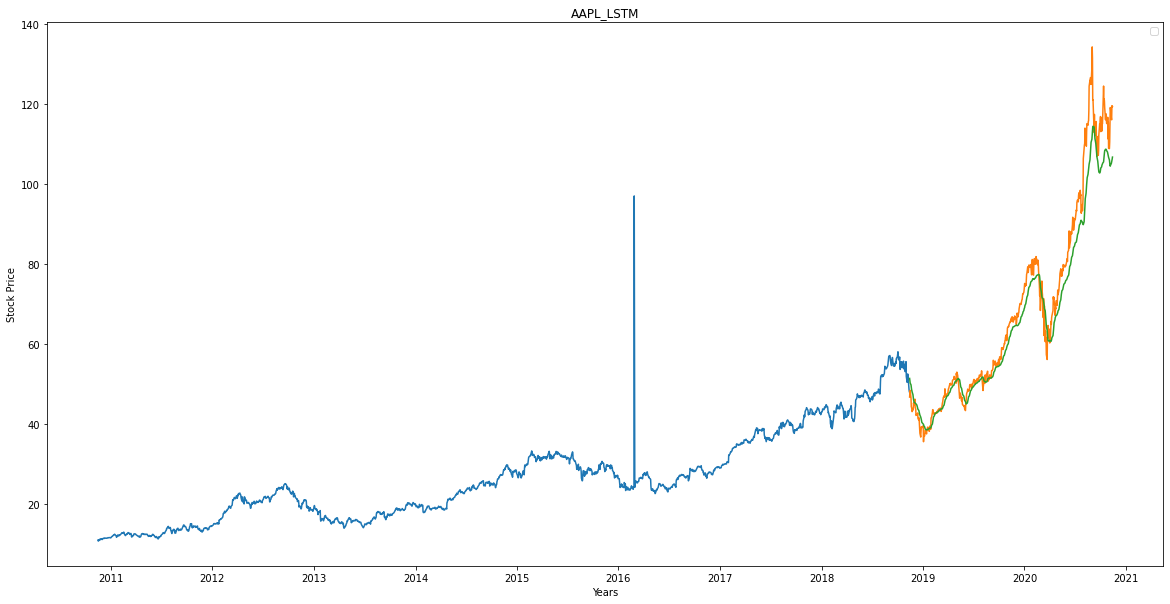

In [118]:
#for plotting
train_Appl = new_data_Appl[:2015]
valid_Appl = new_data_Appl[2015:]
valid_Appl['Predictions'] = closing_price_Appl
plt.plot(train_Appl['Price'])
plt.plot(valid_Appl[['Price','Predictions']])
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("AAPL_LSTM")
plt.legend()
plt.savefig("APPL_LSTM.png")
files.download("APPL_LSTM.png") 

In [ ]:
from google.colab import files

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



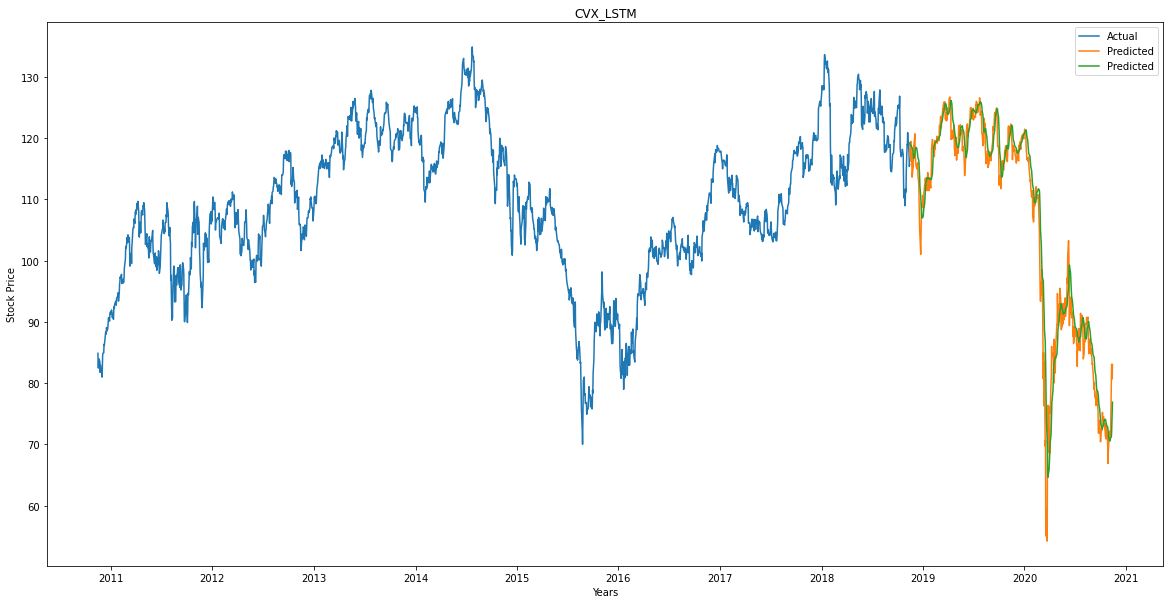

In [119]:
#for plotting
train_CVX = new_data_CVX[:2015]
valid_CVX = new_data_CVX[2015:]
valid_CVX['Predictions'] = closing_price_CVX
plt.plot(train_CVX['Price'], label="Actual")
plt.plot(valid_CVX[['Price','Predictions']], label="Predicted")
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("CVX_LSTM")
plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



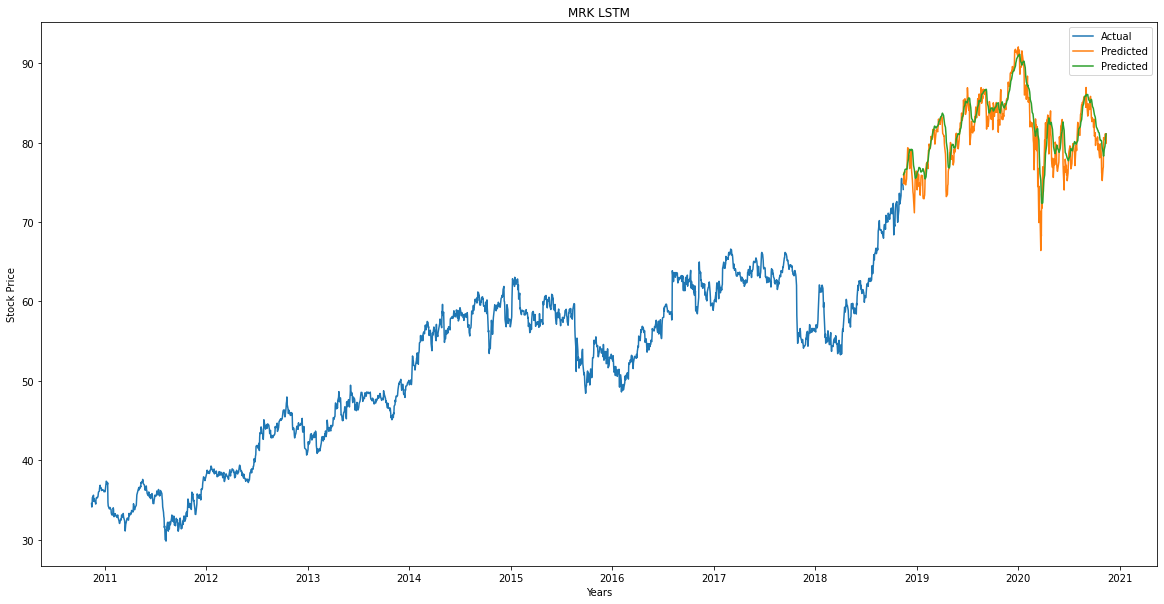

In [132]:
#for plotting
train_MRK = new_data_MRK[:2015]
valid_MRK = new_data_MRK[2015:]
valid_MRK['Predictions'] = closing_price_MRK
plt.plot(train_MRK['Price'], label="Actual")
plt.plot(valid_MRK[['Price','Predictions']], label="Predicted")
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("MRK LSTM")
plt.legend(loc="best")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x720 with 0 Axes>